# Multilayer Perceptron (MLP)

Multilayer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, hidden layer, and output layer. The input layer receives the input signal to be processed. The required task such as prediction and classification is performed by the output layer. An arbitrary number of hidden layers that are placed in between the input and output layer are the true computational engine of the MLP. Similar to a feed forward network in a MLP the data flows in the forward direction from input to output layer. The neurons in the MLP are trained with the back propagation learning algorithm. MLPs are designed to approximate any continuous function and can solve problems which are not linearly separable. The major use cases of MLP are pattern classification, recognition, prediction and approximation.

<img src="https://www.researchgate.net/profile/Ryan-Heartfield/publication/321341597/figure/fig5/AS:667675554480148@1536197665532/MLP-deep-learning-architecture.ppm" width="550" height="380"/>

### Layers and activation function

The MLP consists of three or more layers (an input and an output layer with one or more hidden layers) of nonlinearly-activating nodes. Since MLPs are fully connected, each node in one layer connects with a certain weight ${\displaystyle w_{ij}}$ to every node in the following layer. For each layer $l$, it will have two phases. The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. In MLP, some neurons use a nonlinear activation function. The two historically common activation functions are described by:

$$
y(\upsilon_i) = tanh(\upsilon_i)
$$

$$
y(\upsilon_i) = \frac{1}{1 + e^{-\upsilon_i}}
$$

In recent developments of deep learning the rectifier linear unit (ReLU) is more frequently used as one of the possible ways to overcome the numerical problems related to the sigmoids. The plot above uses the ReLU.

### Learning

Learning occurs in the perceptron by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. This is an example of supervised learning, and is carried out through backpropagation, a generalization of the least mean squares algorithm in the linear perceptron.

We can represent the degree of error in an output node ${\displaystyle j}$ in the ${\displaystyle n}$th data point (training example) by ${\displaystyle e_{j}(n)=d_{j}(n)-y_{j}(n)}$, where ${\displaystyle d}$ is the target value and ${\displaystyle y}$ is the value produced by the perceptron. The node weights can then be adjusted based on corrections that minimize the error in the entire output, given by ${\displaystyle {\mathcal {E}}(n)={\frac {1}{2}}\sum _{j}e_{j}^{2}(n)}$.

Using gradient descent, the change in each weight is ${\displaystyle \Delta w_{ji}(n) = -\eta {\frac {\partial {\mathcal {E}}(n)}{\partial v_{j}(n)}}y_{i}(n)}$, where ${\displaystyle y_{i}}$ is the output of the previous neuron and ${\displaystyle \eta }$ is the learning rate, which is selected to ensure that the weights quickly converge to a response, without oscillations.

### Mini Batch

Mini batch divides the training data records into groups of approximately equal size, then updates the synaptic weights after passing one group; that is, mini-batch training uses information from a group of records. Then the process recycles the data group if necessary. Mini-batch training offers a compromise between batch and online training, and it may be best for "medium-size" datasets. The procedure can automatically determine the number of training records per mini-batch, or you can specify an integer greater than 1 and less than or equal to the maximum number of cases to store in memory.

---
# My Implementation on CIFAR10 Small Images Classification Dataset

I choose to implement the MLP algorithm using the CIFAR10 Small Images Classification Dataset from keras.datasets. The CIFAR10 Small Images Classification Dataset is a dataset of 50,000 32 $\times$ 32 color training images and 10,000 test images, labeled over 10 categories. Below are the 10 categories:

* Label 0: airplane
* Label 1: automobile
* Label 2: bird
* Label 3: cat
* Label 4: deer
* Label 5: dog
* Label 6: frog
* Label 7: horse
* Label 8: ship
* Label 9: truck

For this dataset, We build a multilayered perceptron with a single input layer with 3072 input nodes, 2 hidden layers of arbitrary size, and 10 output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function.

$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$

For our cost function, we will use the Mean Sqaure Error (MSE) cost.
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

---
# Libraries Used

The following packages are used to implement this algorithm.

1. [numpy](https://numpy.org/doc/)
2. [matplotlib](https://matplotlib.org/)
3. [keras](https://keras.io/api/datasets/)

---
# Coding Part

Import necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras # To load the data

Load the CIFAR10 small images classification dataset.

In [3]:
(train_X, train_y), (test_X, test_y) = keras.datasets.cifar10.load_data()

#### Check the shape of X in the training set

This is a dataset of 50,000 32 $\times$ 32 color training images.

In [4]:
train_X.shape

(50000, 32, 32, 3)

In [5]:
train_X[0].shape

(32, 32, 3)

#### Check the shape of y in the training set

It has a shape of (50,000, 1).

In [6]:
train_y.shape

(50000, 1)

In [7]:
train_y[0]

array([6], dtype=uint8)

### Visualization of the training set

Let's take a look at the first image in the training set.

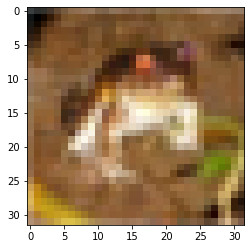

In [8]:
plt.imshow(train_X[0], cmap = "gray")

Now, check the maximum of the training set.

In [9]:
np.max(train_X)

255

The maximum is 255, so we scale the training set and the test set by dividing them by 255. 

In [10]:
train_X = train_X/255
test_X = test_X/255
test_X[0].shape

(32, 32, 3)

Change "test_X[0]"  to a list by using "flatten", so now it has a length of 32 $\times$ 32 $\times$ 3 = 3072. Then reshape it to (3072, 1).

In [11]:
train_X[0].flatten().shape

(3072,)

In [12]:
train_X[0].flatten().reshape(3072, 1).shape

(3072, 1)

For the training set, we write for loops to temporarily store flattened matrices into X and temporarily store one-hot encoded label vectors into Y.

In [13]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(3072, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

Let $p$ to be the first training data combining X and y.

In [14]:
p = train_data[0]
print(p[1])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Perform the similar for loops on the test set.

In [15]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(3072, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

### Sigmoid

Now define a sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$.

Define a function for the first derivative of the sigmoid called "sigmoid_prime".

Also define a loss function MSE: $C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2$.

In [16]:
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

Define a function to initialze weights and bias. The parameters are the number of input data in the first layer (3072), number of nodes in the hidden layers (60), and the number of nodes for the last layer (10) respectively.

In [17]:
def initialize_weights(layers = [3072, 60, 60, 10]):
  W = [[0.0]] # W = [[0,0],W1,W2,W3], placeholder
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [18]:
W, B = initialize_weights() #store W and B

In [19]:
x, y = train_data[0]

### First layer:

The general steps here is:
1. let $a^0 = x$.
2. for $i = 1$ to $L$, $z^l = W^l a^{l-1} + b^l$.
3. $a^l = \sigma(z^l)$.
4. Finish with $a^L$. We will then get the output.

In [20]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [21]:
a1.shape

(60, 1)

### Second layer:

In [22]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


### Third layer:

In [23]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


Now, combine everything and feed forward.

In [24]:
W, B = initialize_weights(layers = [3072, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i - 1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

Here, let's check the shape of the output layer.

In [25]:
A[-1].shape

(10, 1)

### Delta values

Now, create a dictionary to store "deltas".

In [26]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L - 1] = delta_last

In [27]:
deltas[L - 1]

array([[0.0433551 ],
       [0.13492601],
       [0.12010019],
       [0.10034714],
       [0.11237914],
       [0.11631658],
       [0.04196803],
       [0.14781981],
       [0.1060701 ],
       [0.02200494]])

In [28]:
for l in range(L - 2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

Check the shape of the first layer.

In [29]:
deltas[1].shape

(60, 1)

Check the shape of the second layer.

In [30]:
deltas[2].shape

(60, 1)

Check the shape of the third layer.

In [31]:
deltas[3].shape #bias

(10, 1)

Set the learning rate $\alpha$ to 0.04 and perform gradient descent.

In [32]:
alpha = 0.04
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i - 1].T
  B[i] = B[i] - alpha*deltas[i]

Now combine everthing and feed forward. Do the predictions.

In [33]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i - 1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L - 2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l + 1]) * sigmoid_prime(Z[l])

  return A, deltas

Define a function for MSE with feed forward prediction.

In [34]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector = True)
    c += mse(a, p[1])
  return c/len(data)

Print the initial cost.

In [35]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.491863618835627


The initial cost is 1.5940682147095273.

See how the predicted value compared with the actual value.

Predicted Value = 3
Actual Value = [7]


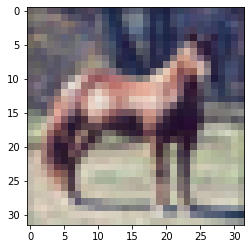

In [39]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector = True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap = "gray")
plt.show()

The prediction is wrong.

### Stochastic gradient descent

Now let's formally define a function for gradient descent with a learning rate $\alpha = 0.04$ and set $epochs = 3$. Recall that epochs is the number of iterations.

In [40]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i - 1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

In [41]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 1.491863618835627
0 Cost = 3.467311787278772e-05
1 Cost = 1.6848888294709726e-05
2 Cost = 1.106527450991232e-05


We now get three costs. The cost decreases a lot after each training.

Finally, combine everything.

In [42]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [3072, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i - 1])*np.sqrt(2/self.layers[i - 1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [3072, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i - 1])*np.sqrt(2/self.layers[i - 1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i - 1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L - 1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L - 2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i - 1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
      for j in range(0,data_length-batch_size,batch_size):
        delta_list = []
        A_list = []
        for p in data[j:j + batch_size]:
          A, deltas = self.deltas_dict(p)
          A_list.append(A)

          for i in range(1, self.L):
            self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i - 1].T for da in zip(delta_list, A_list))
            self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

In [43]:
net = MultilayerPerceptron(layers = [3072, 60, 60, 10])

### Costs when using stochastic gradient descent

In [44]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.3102156975400356
2 Cost = 1.0523360691995571e-05


### Cost when using mini batch

In [45]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 1.0523360691995571e-05
2 Cost = 1.0523360691995571e-05


In [46]:
net.MSE(test_data)

1.0474173866376239e-05

---
# Reference

S. Abirami, P. Chitra (2020). Multilayer Perceptron. Advances in Computers. https://www.sciencedirect.com/topics/computer-science/multilayer-perceptron

Training (Multilayer Perceptron). https://www.ibm.com/docs/en/spss-statistics/24.0.0?topic=perceptron-training-multilayer

Multilayer perceptron. Wikipedia. https://en.wikipedia.org/wiki/Multilayer_perceptron